In [1]:
# Import necessary packages
import os
import tensorflow as tf

# Import necessary files/functions
from VisualizingData.VisualizeData import init_metadata, read_metadata, visualize_metadata
from LoadingData.LoadData import load_to_dataframe, malicious_examples, benign_examples, single_malicious_example, single_benign_example
from Training.TrainGAN import train, display_training_predictions, plot_loss_functions
from Models.Discriminator import visualize_mal_prediction, visualize_ben_prediction

In [2]:
# Declaring a variable for the path to the Ember dataset
dataset_dir = "E:/QMIND/DataSet/ember"

In [3]:
# Check that metadata.csv is in the desired directory and initialize it if not
dataset_dir_files = os.listdir(dataset_dir)
if 'metadata.csv' not in dataset_dir_files:
    init_metadata(dataset_dir)
# read the data from metadata.csv file and display the contents 
metadata = read_metadata(dataset_dir)
print(metadata)

Metadata has been read
                                                    sha256 appeared subset  \
0        0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...  2006-12  train   
1        d4206650743b3d519106dea10a38a55c30467c3d9f7875...  2006-12  train   
2        c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...  2007-01  train   
3        7f513818bcc276c531af2e641c597744da807e21cc1160...  2007-02  train   
4        ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...  2007-02  train   
...                                                    ...      ...    ...   
1099995  fffe314f23cee3a68ccab272934877d3bc18ec3bd905df...  2017-12   test   
1099996  fffe7a1b23e04facc9ca91a93ac4a34e8b3040e023dbde...  2017-12   test   
1099997  fffe801f51e7ec931515aa49a3d157a9c0fbcdca8c9d80...  2017-12   test   
1099998  fffe92f9593649c4a7050302368189de45e2c1c06b04ea...  2017-12   test   
1099999  ffffb259a4c5e25ae1437af59caafb718cf8879187cc8c...  2017-12   test   

         label  
0            0  
1     

Metadata
Number of Malicious Files in Train Subset: 300000
Number of Benign Files in Train Subset: 300000
Number of Unlabeled Files in Train Subset: 300000

Number of Malicious Files in Test Subset: 100000
Number of Benign Files in Test Subset: 100000
Number of Unlabeled Files in Test Subset: 0

Malicious File Ratio: 0.2727272727272727
Benign File Ratio: 0.2727272727272727
Unlabeled File Ratio: 0.2727272727272727

Malicious File Ratio: 0.09090909090909091
Benign File Ratio: 0.09090909090909091
Unlabeled File Ratio: 0.0



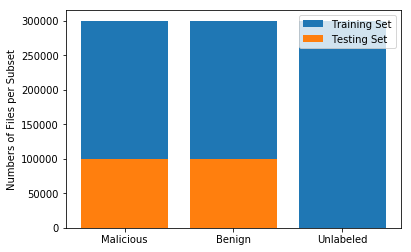

In [4]:
# Output a histogram depicting the number of files of each label in loaded data
visualize_metadata(metadata)

In [ ]:
# Loading the dataset into a dataframe for convenience
dataframe = load_to_dataframe(dataset_dir)

Vectorized training features have been read
Vectorized test features has been read
Converting X_train from np.memmap to tf.tensor
Shape of X_train tensor is (900000, 2381)
X_train conversion complete
Converting X_test from np.memmap to tf.tensor
Shape of X_test tensor is (200000, 2381)
X_test conversion complete
Loading tf.tensor data into pd.DataFrame
Training data has been loaded into pd.DataFrame


In [ ]:
# Declaring hyperparameters for Epoch and the floor value for Batch Size
EPOCH = 20
BATCH_SIZE_FLOOR = 391
NUM_LOAD_FILES = 5000

In [ ]:
# Train the models
generator, discriminator, training_predictions, loss_value_lists = train(EPOCH, BATCH_SIZE_FLOOR, NUM_LOAD_FILES)

In [ ]:
# Define the number of malicious and benign predictions made during training
predicted_benign = training_predictions[0]
predicted_malicious = training_predictions[1]

# Display the number of files predicted as malicious or benign during training in a pie chart
display_training_predictions(predicted_benign, predicted_malicious)

In [ ]:
# Define the lists of generator loss values and discriminator loss values from tuple output during training
generator_loss_list = loss_value_lists[0]
discriminator_loss_list = loss_value_lists[1]

# Display the lists of lost values for each model taken at each epoch
print("Generator Loss Values: {}".format(generator_loss_list))
print("Discriminator Loss Values: {}".format(discriminator_loss_list))

# Plot the loss values for both models
plot_loss_functions(generator_loss_list, discriminator_loss_list, EPOCH)

In [ ]:
# Load individual examples of both malicious files and benign 
mal_example = single_malicious_example(malicious_examples(dataframe))
ben_example = single_benign_example(benign_examples(dataframe))
malicious = tf.expand_dims(mal_example, 0)
benign = tf.expand_dims(ben_example, 0)

# Convert these examples from Tensor to array in order to view the data contained
malicious_data = mal_example.numpy()
benign_data = ben_example.numpy()

print(malicious_data)
print(benign_data)

In [ ]:
# Pass the malicious and benign examples into the discriminator to get predictions on file type
mal_prediction = discriminator.predict_on_batch([malicious])
ben_prediction = discriminator.predict_on_batch([benign])

In [ ]:
# Print the features of the malicious and benign files being used at this step
if mal_prediction.numpy() < [[0.5]]:
    label = [[0.]]
    visualize_ben_prediction()
elif mal_prediction.numpy() >= [[0.5]]:
    label = [[1.]]
    visualize_mal_prediction()

print("Prediction on Malicious Vectorized Features: {}".format(label))

In [ ]:
# Print the features of the malicious and benign files being used at this step
if ben_prediction.numpy() < [[0.5]]:
    label = [[0.]]
    visualize_ben_prediction()
elif ben_prediction.numpy() >= [[0.5]]:
    label = [[1.]]
    visualize_mal_prediction()
    
print("Prediction on Benign Vectorized Features: {}".format(label))

In [ ]:
# Create a tensor of random noise to pass into the generator 
noise = tf.random.uniform([1, 2381])

# Pass the malicious file through the generator and test the output against the discriminator
adversarial_example = generator.predict_on_batch([malicious, noise])
print(adversarial_example.numpy())

In [ ]:
# Use the discriminator to make prediction on the output adversarial example
adversarial_prediction = discriminator.predict_on_batch([adversarial_example])
if adversarial_prediction.numpy() < [[0.5]]:
    label = [[0.]]
    visualize_ben_prediction()
elif adversarial_prediction.numpy() >= [[0.5]]:
    label = [[1.]]
    visualize_mal_prediction()
print("Prediction: {}".format(label))